<a href="https://colab.research.google.com/github/modhudeb/Titanic-Survive-Prediction/blob/main/titanic_survive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# loading

In [ ]:
data = pd.read_csv('ttnc_train.csv', index_col='PassengerId')

In [ ]:
data.head()
df =  data.copy()

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing

In [ ]:
df.info()
print("\n\nTotall nulls : \n",df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Totall nulls : 
 Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [ ]:
# getting rid of unnecessary columns
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [ ]:
# balancing all observations
df.drop(df[df.Embarked.isnull()].index, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,NaN,0,0,8.4583,Q
7,0,1,male,54.0,0,0,51.8625,S
8,0,3,male,2.0,3,1,21.0750,S
9,1,3,female,27.0,0,2,11.1333,S


### handling object type data

In [ ]:
# pd.unique(df.Sex)
# pd.unique(df.Embarked)
print(df['Sex'].value_counts(),"\n")
print(df['Embarked'].value_counts())

male      577
female    312
Name: Sex, dtype: int64 

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
encoder_1 =  LabelEncoder()
df.Sex = encoder_1.fit_transform(df['Sex'])

In [ ]:
encoder_2 = OneHotEncoder(sparse=False)
df[['C','Q','S']] = encoder_2.fit_transform(df[['Embarked']])

In [ ]:
df[['C','S','Q']] = df[['C','S','Q']].apply(lambda x : np.int64(x), axis = 0)

In [ ]:
df.drop(columns='Embarked', inplace = True)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,0,1
2,1,1,0,38.0,1,0,71.2833,1,0,0
3,1,3,0,26.0,0,0,7.9250,0,0,1
4,1,1,0,35.0,1,0,53.1000,0,0,1
5,0,3,1,35.0,0,0,8.0500,0,0,1
6,0,3,1,NaN,0,0,8.4583,0,1,0
7,0,1,1,54.0,0,0,51.8625,0,0,1
8,0,3,1,2.0,3,1,21.0750,0,0,1
9,1,3,0,27.0,0,2,11.1333,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   C         889 non-null    int64  
 8   Q         889 non-null    int64  
 9   S         889 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 76.4 KB


### Handling missing values

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=4)
df.Age = imputer.fit_transform(df[['Age']])

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
C           0
Q           0
S           0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.000000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.000000,3.0,3.0000
Sex,889.0,0.649044,0.477538,0.00,0.0000,1.000000,1.0,1.0000
Age,889.0,29.642093,12.968346,0.42,22.0000,29.642093,35.0,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.000000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.000000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.454200,31.0,512.3292
C,889.0,0.188976,0.391710,0.00,0.0000,0.000000,0.0,1.0000
Q,889.0,0.086614,0.281427,0.00,0.0000,0.000000,0.0,1.0000
S,889.0,0.724409,0.447063,0.00,0.0000,1.000000,1.0,1.0000


### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df[['Sex','Fare','Age','Pclass']] = scaler.fit_transform(df[['Sex','Fare','Age','Pclass']])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,889.0,3.824522e-01,0.486260,0.000000,0.000000,0.000000e+00,1.000000,1.000000
Pclass,889.0,-2.437745e-16,1.000563,-1.572211,-0.373501,8.252086e-01,0.825209,0.825209
Sex,889.0,4.395934e-17,1.000563,-1.359911,-1.359911,7.353420e-01,0.735342,0.735342
Age,889.0,-2.957264e-16,1.000563,-2.254608,-0.589620,-5.482138e-16,0.413385,3.885326
SibSp,889.0,5.241845e-01,1.103705,0.000000,0.000000,0.000000e+00,1.000000,8.000000
Parch,889.0,3.824522e-01,0.806761,0.000000,0.000000,0.000000e+00,0.000000,6.000000
Fare,889.0,1.398706e-16,1.000563,-0.646204,-0.487238,-3.551972e-01,-0.022080,9.668551
C,889.0,1.889764e-01,0.391710,0.000000,0.000000,0.000000e+00,0.000000,1.000000
Q,889.0,8.661417e-02,0.281427,0.000000,0.000000,0.000000e+00,0.000000,1.000000
S,889.0,7.244094e-01,0.447063,0.000000,0.000000,1.000000e+00,1.000000,1.000000


In [ ]:
# ignore
ndf = df.copy()

## Treating Outliers

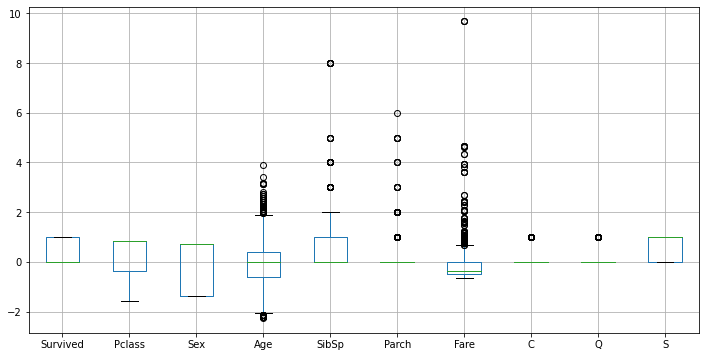

In [ ]:
ndf.boxplot(figsize=(12,6))

In [ ]:
# treating AGE column's outliers
q1_age = np.percentile(ndf['Age'],25)
q3_age = np.percentile(ndf['Age'],75)
iqr_age = q3_age - q1_age

lowBound = df.index[ndf['Age']< (q1_age - 1.5*iqr_age)]
upBound = df.index[ndf['Age']> (q3_age + 1.5*iqr_age)]
outIndex_age = np.concatenate((lowBound, upBound))

In [ ]:
# treating Fare column's outliers
q1_fare = np.percentile(ndf['Fare'],25)
q3_fare = np.percentile(ndf['Fare'],75)
iqr_fare = q3_fare - q1_fare

lowBound = df.index[ndf["Fare"] < (q1_fare - 1.5*iqr_fare)]
upBound = df.index[ndf["Fare"] > (q3_fare + 1.5*iqr_fare)]
outIndex_fare = np.concatenate((lowBound,upBound))

In [ ]:
outIndex = np.concatenate((outIndex_age, outIndex_fare))
ndf.shape[0]

889

In [ ]:
# Removing All outliers
ndf.drop(outIndex, inplace=True)
ndf.shape[0]

721

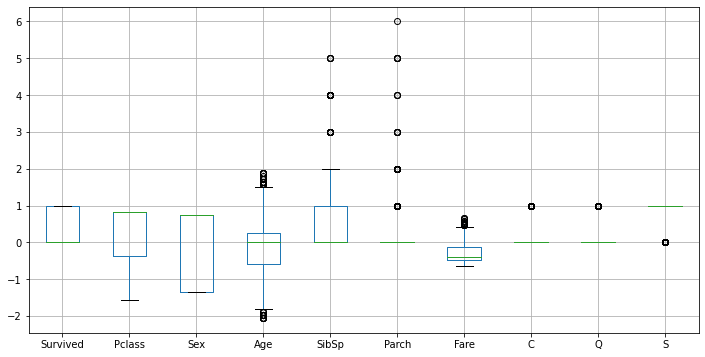

In [ ]:
ndf.boxplot(figsize=(12,6))

In [ ]:
df = ndf.copy()

### Handling IMBALANCED Target data

In [ ]:
viz = df['Survived'].value_counts()

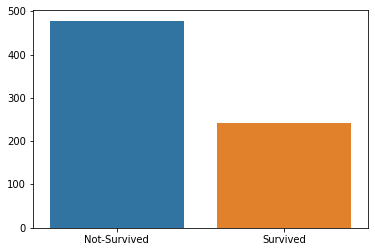

In [ ]:
sns.barplot(x = ['Not-Survived', 'Survived'], y = viz.values)

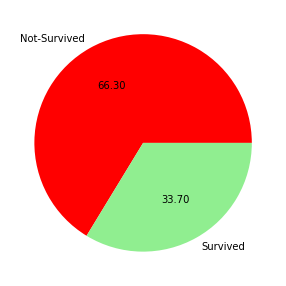

In [ ]:
def pieTest(plt:plt, x, labelsss, colorsss=None):
  plt.figure(1, figsize = (10,5))
  plt.pie(x, labels= labelsss, autopct = '%.2f', colors = colorsss)


pieTest(plt, viz.values, ['Not-Survived', 'Survived'], ['red', 'lightgreen'])

The target data set is Imbalanced

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
imbManage = SMOTE(k_neighbors=3, n_jobs = -1, random_state = 42)
features, target = imbManage.fit_resample(df.drop(columns=['Survived']), df.Survived)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  956 non-null    float64
 1   Sex     956 non-null    float64
 2   Age     956 non-null    float64
 3   SibSp   956 non-null    int64  
 4   Parch   956 non-null    int64  
 5   Fare    956 non-null    float64
 6   C       956 non-null    int64  
 7   Q       956 non-null    int64  
 8   S       956 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 67.3 KB


In [ ]:
viz2 = target.value_counts()

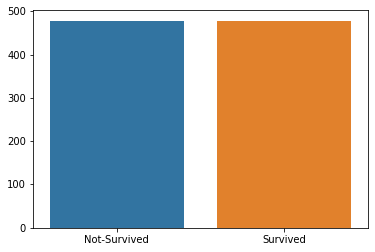

In [ ]:
sns.barplot(x = ['Not-Survived', 'Survived'], y = viz2.values)

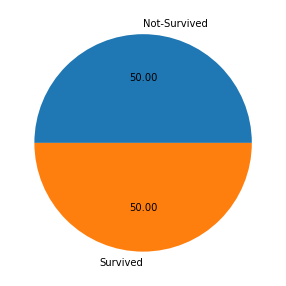

In [ ]:
pieTest(plt,viz2.values,["Not-Survived",'Survived'])

Now target data is Balanced

# Feature engineering and selection

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(features, target, test_size=0.33, random_state = 42)

## EDA

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
p_scores = mutual_info_classif(features, target, random_state=42)

In [ ]:
scores = pd.DataFrame(p_scores, index = features.columns, columns=['SCORE'])

In [ ]:
scores = scores.sort_values(by = 'SCORE', ascending=False)
scores

,SCORE
Fare,0.142361
Sex,0.133751
Age,0.071380
Pclass,0.040114
Q,0.032435
SibSp,0.020229
Parch,0.017332
S,0.004009
C,0.000000


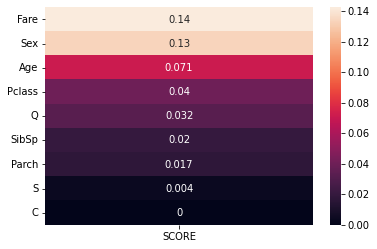

In [ ]:
sns.heatmap(scores, annot = True)

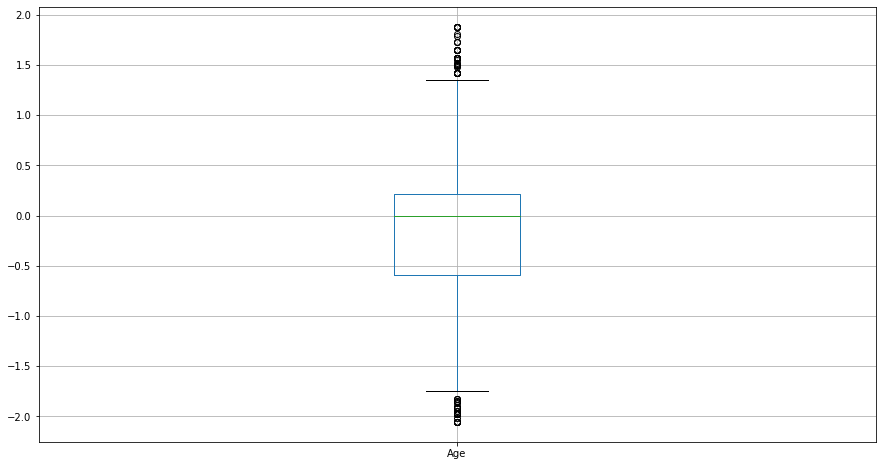

In [ ]:
features[['Age']].boxplot(figsize=(15,8))

Sex and Fare columns has high correlation to Target column

# Algorithm part

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV 

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(penalty="l1",solver='liblinear',tol = 0.001,random_state=42)
clf.fit(xtrain[['Sex','Fare','Age']],ytrain)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear', tol=0.001)

In [ ]:
ypred_trn = clf.predict(xtrain[['Sex','Fare','Age']])
ypred_tst = clf.predict(xtest[['Sex','Fare','Age']])

In [ ]:
report1 = classification_report(ytrain, ypred_trn)
report2 = classification_report(ytest, ypred_tst)
print(report1)
print(report2)

              precision    recall  f1-score   support

           0       0.73      0.85      0.78       325
           1       0.81      0.68      0.74       315

    accuracy                           0.76       640
   macro avg       0.77      0.76      0.76       640
weighted avg       0.77      0.76      0.76       640

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       153
           1       0.81      0.74      0.78       163

    accuracy                           0.78       316
   macro avg       0.78      0.78      0.78       316
weighted avg       0.78      0.78      0.78       316



## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
crf = RandomForestClassifier()

In [ ]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Hyper-parameter tuning

In [ ]:
params = {    
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,25,30],
    'max_features': ['sqrt','log2','None'],
    'min_samples_leaf': [2,5,10,20,50],
    'min_samples_split': [7,12,25,60],
    'n_estimators': [200,300,400,500,600],
    'verbose': [0,1],
    'n_jobs' : [-1]
}

In [ ]:
randSearch = RandomizedSearchCV(crf, params, n_iter = 20, scoring = 'accuracy', random_state = 42, n_jobs=-1)

In [ ]:
randSearch.fit(xtrain[['Sex','Fare','Age']], ytrain)

In [ ]:
randSearch.best_score_

0.7921875

In [ ]:
crf2 = randSearch.best_estimator_

In [ ]:
crf2.fit(xtrain[['Sex','Fare','Age']], ytrain)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.5s finished


RandomForestClassifier(bootstrap=False, max_depth=25, max_features='log2',
                       min_samples_leaf=5, min_samples_split=25,
                       n_estimators=400, n_jobs=-1, verbose=1)

In [ ]:
yPreds = crf2.predict(xtest[['Sex','Fare','Age']])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished


In [ ]:
report = classification_report(ytest, yPreds)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       153
           1       0.80      0.82      0.81       163

    accuracy                           0.80       316
   macro avg       0.80      0.80      0.80       316
weighted avg       0.80      0.80      0.80       316



### Cv score

In [ ]:
from sklearn.model_selection import cross_val_score 

In [ ]:
cvscore = cross_val_score(
    estimator=crf2,
    X=xtrain[['Sex','Fare','Age']],
    y=ytrain,
    cv=8,
    n_jobs = -1,
    scoring='accuracy'
)

In [ ]:
cvscore.mean()*100

77.68902293358815

# Vizualizing

In [ ]:
ytest.shape

(316,)

In [ ]:
# confusion_matrix?

In [ ]:
matrx = confusion_matrix(ytest, yPreds)

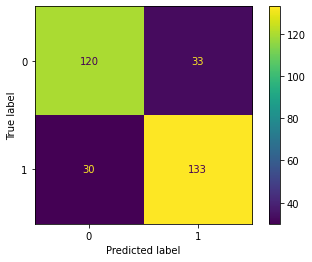

In [ ]:
disp = ConfusionMatrixDisplay(matrx)
disp.plot()

In [ ]:
xtrain[['Sex','Fare']].describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,640.0,-0.091612,1.023526,-1.359911,-1.359911,0.735342,0.735342,0.735342
Fare,640.0,-0.286063,0.274502,-0.646204,-0.487603,-0.384475,-0.122745,0.662445


In [ ]:
# colormesh
xx1,xx2 = np.meshgrid(
    np.linspace(-1.359911	,0.735342,50),
    np.linspace(-0.646204	,9.668551,50),
    sparse=False
)

In [ ]:
crf3 = randSearch.best_estimator_
crf3.fit(xtrain[['Sex','Fare']], ytrain)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.6s finished


RandomForestClassifier(bootstrap=False, max_depth=25, max_features='log2',
                       min_samples_leaf=5, min_samples_split=25,
                       n_estimators=400, n_jobs=-1, verbose=1)

In [ ]:
fakeTrain = np.c_[xx1.ravel(),xx2.ravel()]
fakePred = crf3.predict(fakeTrain)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.2s finished


In [ ]:
fakePred.shape

(2500,)

In [ ]:
fakePred = fakePred.reshape(xx1.shape)

In [ ]:
fakePred.shape

(50, 50)

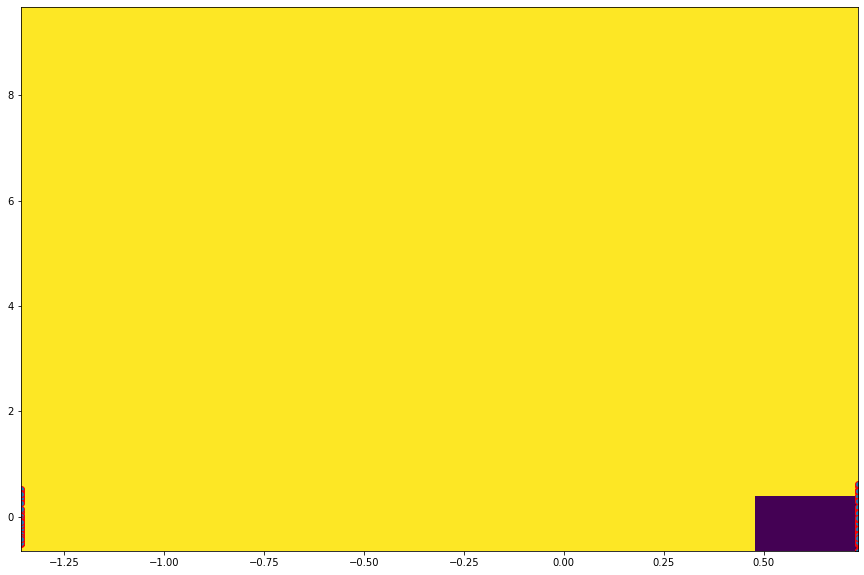

In [ ]:
plt.figure(figsize=[15,10])
plt.pcolormesh(xx1,xx2,fakePred)
plt.scatter(xtest['Sex'], xtest['Fare'], edgecolor='red')
plt.show()